In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
student_data=pd.read_csv("StudentsPerformance.csv")
student_data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
student_data.value_counts("gender")

gender
female    518
male      482
Name: count, dtype: int64

In [5]:
student_data.value_counts("race/ethnicity")

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [6]:
avg_math=student_data["math score"].mean()
print(f"Average score in math: {avg_math}")

avg_reading=student_data["reading score"].mean()
print(f"Average score in reading: {avg_reading}")

avg_writing=student_data["writing score"].mean()
print(f"Average score in writing: {avg_writing}")

Average score in math: 66.089
Average score in reading: 69.169
Average score in writing: 68.054


In [9]:
avg_scores_by_gender=student_data.groupby("gender")[["math score","reading score","writing score"]].mean()
avg_scores_by_gender

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [10]:
avg_scores_by_parental_edu=student_data.groupby("parental level of education")[["math score","reading score","writing score"]].mean()
avg_scores_by_parental_edu

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


In [11]:
avg_scores_by_test_prep=student_data.groupby("test preparation course")[["math score","reading score","writing score"]].mean()
avg_scores_by_test_prep

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


In [12]:
student_data["total score"]=student_data["math score"]+student_data["reading score"]+student_data["writing score"]
student_data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282
996,male,group C,high school,free/reduced,none,62,55,55,172
997,female,group C,high school,free/reduced,completed,59,71,65,195
998,female,group D,some college,standard,completed,68,78,77,223


In [14]:
top_five=student_data[["gender","total score"]].sort_values(by="total score",ascending=False).head(5)
top_five

,gender,total score
916,male,300
962,female,300
458,female,300
114,female,299
712,female,297


In [18]:
student_data["average score"]=student_data[["math score","reading score","writing score"]].mean(axis=1)
student_data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


In [19]:
def classify(avg_score):
    if avg_score>=85:
        return "High"
    elif avg_score<85 and avg_score>=70:
        return "Medium"
    else:
        return "Low"

In [20]:
student_data["student category"]=student_data["average score"].apply(classify)
student_data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score,student category
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,Medium
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,Medium
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,High
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,Low
4,male,group C,some college,standard,none,76,78,75,229,76.333333,Medium
...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000,High
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333,Low
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000,Low
998,female,group D,some college,standard,completed,68,78,77,223,74.333333,Medium


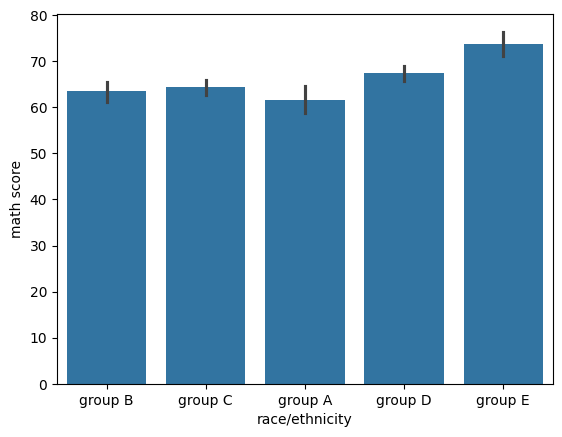

In [21]:
sns.barplot(data=student_data,x="race/ethnicity",y="math score")
plt.show()

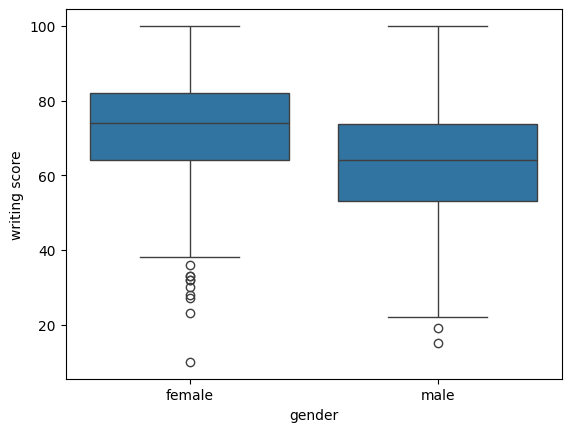

In [22]:
sns.boxplot(data=student_data,x="gender",y="writing score")
plt.show()

In [26]:
students_above_90=student_data[(student_data["math score"]>90) & (student_data["reading score"]>90) & (student_data["writing score"]>90)]
students_above_90

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score,student category
114,female,group E,bachelor's degree,standard,completed,99,100,100,299,99.666667,High
149,male,group E,associate's degree,free/reduced,completed,100,100,93,293,97.666667,High
165,female,group C,bachelor's degree,standard,completed,96,100,100,296,98.666667,High
179,female,group D,some high school,standard,completed,97,100,100,297,99.000000,High
451,female,group E,some college,standard,none,100,92,97,289,96.333333,High
458,female,group E,bachelor's degree,standard,none,100,100,100,300,100.000000,High
546,female,group A,some high school,standard,completed,92,100,97,289,96.333333,High
566,female,group E,bachelor's degree,free/reduced,completed,92,100,100,292,97.333333,High
571,male,group A,bachelor's degree,standard,none,91,96,92,279,93.000000,High
594,female,group C,bachelor's degree,standard,completed,92,100,99,291,97.000000,High


In [29]:
below_avg_students=student_data[(student_data["math score"]<student_data["math score"].mean()) & (student_data["reading score"]<student_data["reading score"].mean()) & (student_data["writing score"]<student_data["writing score"].mean())]
below_avg_students

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score,student category
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,Low
7,male,group B,some college,free/reduced,none,40,43,39,122,40.666667,Low
8,male,group D,high school,free/reduced,completed,64,64,67,195,65.000000,Low
9,female,group B,high school,free/reduced,none,38,60,50,148,49.333333,Low
10,male,group C,associate's degree,standard,none,58,54,52,164,54.666667,Low
...,...,...,...,...,...,...,...,...,...,...,...
985,male,group A,high school,standard,none,57,51,54,162,54.000000,Low
986,female,group C,associate's degree,standard,none,40,59,51,150,50.000000,Low
988,female,group A,some high school,free/reduced,none,44,45,45,134,44.666667,Low
994,male,group A,high school,standard,none,63,63,62,188,62.666667,Low


In [31]:
corr=student_data[["reading score","writing score"]].corr()
corr

,reading score,writing score
reading score,1.000000,0.954598
writing score,0.954598,1.000000


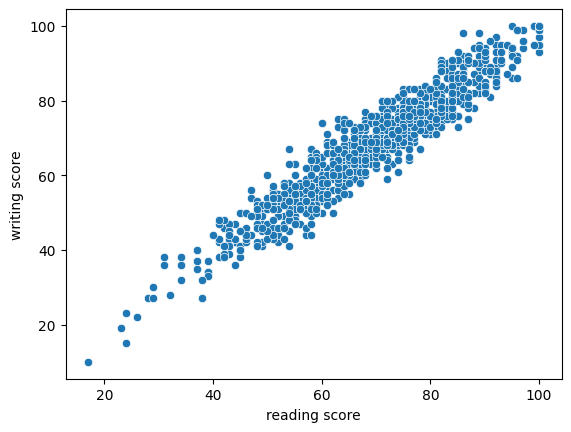

In [30]:
sns.scatterplot(data=student_data,x="reading score",y="writing score")
plt.show()